In [1]:
# importing these libraries to use to work with the housing dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

## Task 01 - Start

#### Examing the data, there may be some anomalies in the data, and you will have to clean the data before you move forward to other tasks. Explain what you did to clean the data. 

In [2]:
# using Pandas to load the CSV file from within the same directory

dataset = pd.read_csv('./AB_NYC_2019.csv')

In [3]:
# printing out the head of the dataset for viewing
# noticing the third row, when the number of reviews is equal to 0, the last_review column
# and the reviews_per_month column both have NaN values, which means that no value was entered into the CSV block.

dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# seeing how many missing values there are per each column
#     (1) can see that there are 16 listings where the name of the Airbnb is not available
#     (2) can also see that there are 21 listings where the host name is not available
#     (3) for the last review and reviews per month, there are 10,052 missing data entries.
#             As the cell above has shown, the 10052 missing entries for last_review and reviews_per_month
#             may be attributed to the number_of_reviews column being equal to a 0.

missing_count = dataset.isna().sum()
print(missing_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# seeing how many rows there are

print("The number of rows is:",dataset.shape[0])

# seeing how many columns there are

print("The number of columns is:", dataset.shape[1])

The number of rows is: 48895
The number of columns is: 16


In [6]:
# There are 16 rows where the name of the airbnb listing is missing.
# There are 21 rows where the host_name of the airbnb listing is missing.
# Will remove those rows since those entries are miniscule compared to the 48,895 total rows in the dataset.

dataset = dataset.dropna(axis=0, subset=['name'])
dataset = dataset.dropna(axis=0, subset=['host_name'])

In [7]:
# since the number of reviews is equal to 0 for a listing, it's only reasonable to set the 
# reviews_per_month value equal to 0 too since no reviews have been entered.
# there is no change made to the last_review column since there can't be a date equal to 0.

dataset.loc[dataset['number_of_reviews'] == 0, 'reviews_per_month'] = 0

In [8]:
# Printing the count of missing values in the current dataset.
# Notice the 10,037 missing values in the last_review column, which is acceptable.
# Can be explained by the fact that those listings haven't had a rating before.
# The number of reviews and the reviews per month would have to be equal to 0.

missing_count = dataset.isna().sum()
print(missing_count)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [9]:
# Seeing how many rows there are after removing the rows where
#     (1) the name of the listing is missing
#     (2) the host name of the listing is missing

print("The number of rows after clearing rows with missing name/host name:", dataset.shape[0])

The number of rows after clearing rows with missing name/host name: 48858


In [10]:
# Printing the number of rows whose value in availability_365 is equal to 0.

# Noticing that the number of listings that are not available during the year to the public
# is 17,508, will leave those rows within the dataset since the percentage compared to the
# 48,858 listings is very significant. Removing those listings would be a bad move.

availability = len(dataset[dataset['availability_365']<=0])
print("The number of listings that are not available to rent during the year is:",availability)

The number of listings that are not available to rent during the year is: 17508


In [11]:
# Examining the details about the dataset such as min, max, and mean of 10 columns that involve numeric values.
# Missing columns: name, host_name, neighbourhood_group, neighbourhood, room_type, last_review

dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
# Noticed that the minimum pricing of a listing is $0, which is highly unreasonable.
# Will have to remove the rows/listings where the price is $0.

# Printing the number of listings where the price is $0.
print("The number of listings with price of $0 is:", len(dataset[dataset['price'] == 0]))

The number of listings with price of $0 is: 11


In [13]:
# The number of listings with price $0 is 11, which is insignificant to the remaining number
# of listings, 48,858. Removing these listings would be acceptable.

# Removing the rows from the dataset if the price is equal to $0.

dataset = dataset[dataset['price'] != 0]

In [14]:
# Examining the number of listings with a minimum number of nights being greater than 28 days.
# These listings are reasonable since some homeowners may seek renters to stay for a longer
# period of time, rather than a short stay.

print("The number of listings with minimum nights being greater than or equal to 28 is:",len(dataset[dataset['minimum_nights'] >= 28]))

The number of listings with minimum nights being greater than or equal to 28 is: 5046


In [15]:
# Examining the number of listings with price greater than the 75th percentile, $175.
# Also examining the listings that may appear as outliers, but may be true representations
# of wealthier neighborhoods and/or those with greater foot traffic/demand, aka Manhattan.

# My decision is to keep them in the dataset since they are still valid listings, which probably
# have a targeted demographic that is more wealthy. 

print("The number of listings with price greater than $175:", len(dataset[dataset['price'] > 175]))
print("The number of listings with price greater than $1000:", len(dataset[dataset['price'] > 1000]))
print("The number of listings with price greater than $5000:",len(dataset[dataset['price'] > 5000]))

The number of listings with price greater than $175: 12167
The number of listings with price greater than $1000: 239
The number of listings with price greater than $5000: 20


In [16]:
# Printing out the shape of the dataset after cleaning the data for abnormalities.

print("The shape of the dataset after cleaning it is:", dataset.shape)

The shape of the dataset after cleaning it is: (48847, 16)


## Task 01 - Explanation

In the cells above, I have displayed my run through with examining the dataset with comments and print statements. Some anomalies in the data were dealt with, such as the listings with no names and/or host names. To deal with those listings, I removed them from the dataset, which consisted of 37 listings. Compared to the 48,895 total listings, I believed that the removal of 37 listings wouldn't contribute a significant impact to the statistical analysis of the dataset as a whole. There were also around 10,037 listings that had no value entered for "reviews_per_month", but I decided to set these empty blocks to a value of 0. This is because these listings had a value of 0 for their "number_of_reviews". 

Another anomaly that I had noticed was that the minimum pricing of the listings was 0, which is definitely not a normal sight. I printed out the number of listings with price 0 and saw that it was 11, which I believed the removal of these 11 listings would be insignificant compared to the remaining 48,858 listings. I decided to remove the listings with price 0. There were some other factors that I noticed that may have been anomalies, but I decided to leave untouched such as the availability being 0, which can be explained by the decision of a homeowner who doesn't want to rent out but has their home on the market. There were also some listings with prices that would be considered to be extremely high, such as prices being greater than $1,000 per night, but this could be reasonably explained for listings in Manhattan and more trendy neighborhoods such as Dumbo, Williamsburg, etc. The listing would cater to more wealthy clients, which explains my decision to keep those listings in the dataset.

## Task 02 - Start

### Examine how the prices of the Airbnb changes with the change in neighborhood.

#### (a) Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood (select only neighborhoods with more than 5 listings).

In [17]:
# Creating a copy of the dataset dataframe since changes made to the copy will not affect
# the original dataset variable. For this task, want to look at neighborhoods that appear
# more than 5 times. Will have to filter out the listings in the neighborhoods that appear
# 5 or less times.

data_gt5 = dataset.copy()


In [18]:
# Applying a filtering function to keep the listings that are in the neighborhoods
# that appear more than 5 times. This can be achieved with a lambda function in the filter.

data_gt5 = data_gt5.groupby('neighbourhood').filter(lambda x: len(x)>5)
data_gt5.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
# Examining the shape of the dataset of the listings that satisfy the condition that
# their neighborhood appears more than 5 times. 

print("The shape of this dataset with neighborhoods greater than 5 is:", data_gt5.shape)

# The dataset before filtering was (48847, 16), but after filtering it was (48755, 16).
# There were 92 listings that were removed and won't be considered when determining
# the top 5 / bottom 5 neighborhoods based on their listings' prices.

The shape of this dataset with neighborhoods greater than 5 is: (48755, 16)


In [20]:
# Sorting the dataset by the neighborhood's and the mean value of the listing prices.
# Decided to use mean instead of median because there are values that can contribute to a
# smaller or larger average value, as opposed to choosing a price from the middle.

data_gt5 = data_gt5.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)


In [21]:
# Returning the top 5 neighborhoods based on the price of the Airbnb in that neighborhood.
# These neighborhoods are the most expensive.

print("These are the top 5 neighborhoods (The most expensive $$$)")
data_gt5.head()


These are the top 5 neighborhoods (The most expensive $$$)


neighbourhood
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Battery Park City    367.086957
Flatiron District    341.925000
Name: price, dtype: float64

In [22]:
# Returning the bottom 5 neighborhoods based on the price of the Airbnb in that neighborhood.
# These neighborhoods are the least expensive.

print("These are the bottom 5 neighborhoods (The least expensive $)")
data_gt5.tail()

These are the bottom 5 neighborhoods (The least expensive $)


neighbourhood
Bronxdale      57.105263
Soundview      53.466667
Tremont        51.545455
Hunts Point    50.500000
Bull's Head    47.333333
Name: price, dtype: float64

## Task 02 - Continued.

#### (b) Analyze the price variation between different neighborhood groups, and plot these trends.

In [23]:
# Finding the mean value for each neighborhood group to present in a bar plot.

data_nb_group_mean = dataset.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)

# Displaying the most expensive to least expensive neighborhood groups and their mean prices 

data_nb_group_mean

neighbourhood_group
Manhattan        196.906571
Brooklyn         124.466285
Staten Island    114.812332
Queens            99.536017
Bronx             87.549632
Name: price, dtype: float64

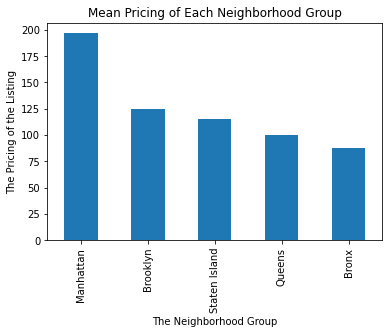

In [24]:
# Examining the bar plot below, we are able to analyze the price differences between different
# neighborhood groups. We are able to see that Manhattan is the most expensive neighborhood
# group with an average pricing of $196.91. The next most expensive neighborhood group is going
# to have to be Brooklyn with an average pricing of $124.47. The third neighborhood group on the
# list is Staten Island with an average pricing of $114.81. The fourth neighborhood group on the 
# list is Queens with an average pricing of $99.54. The least expensive neighborhood group is
# the Bronx with an average pricing of $87.55.

# TLDR: The ranking of most expensive neighborhood group to the least expensive is as follows:
# Manhattan (196.91), Brooklyn (124.47), Staten Island (114.81), Queens (99.54), Bronx (87.55) 

bar_plot_mean = data_nb_group_mean.plot.bar(x='neighbourhood_group', y='price', title='Mean Pricing of Each Neighborhood Group')
bar_plot_mean.set_xlabel("The Neighborhood Group")
bar_plot_mean.set_ylabel("The Pricing of the Listing")
print()

In [25]:
data_nb_group_median = dataset.groupby(['neighbourhood_group'])['price'].median().sort_values(ascending=False)

# Displaying the most expensive to least neighborhood group based on median pricing

data_nb_group_median

neighbourhood_group
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

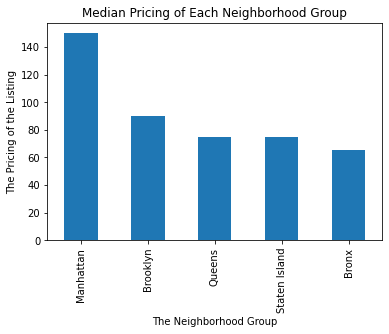

In [26]:
# Examining the bar plot below, we are able to analyze the price differences between the neighborhood
# groups based on their median pricing. Manhattan is the most expensive with their median price being
# $150.00. The 2nd most expensive neighborhood group is Brooklyn with a median price of $90.00. Next,
# there is a tie between Queens and Staten Island with a median price of $75.00. The least expensive
# neighborhood group is the Bronx with a median price of $65.00.

# TLDR: The most expensive to least expensive neighborhood groups based on their median pricing is as follows:
# Manhattan ($150), Brooklyn ($90), Queens and Staten Island ($75), the Bronx ($65)

bar_plot_median = data_nb_group_median.plot.bar(x='neighbourhood_group', y='price', title='Median Pricing of Each Neighborhood Group')
bar_plot_median.set_xlabel("The Neighborhood Group")
bar_plot_median.set_ylabel("The Pricing of the Listing")
print()

## Task 02 - Explanation

#### (a) The Top 5 and Bottom 5 neighborhoods based on the price of the Airbnb in that neighborhood

The Top 5 neighborhoods, which were the most expensive, based on the mean pricing of their Airbnb listings were:

1. Tribeca              490.64

2. Sea Gate             487.86

3. Riverdale            442.09

4. Battery Park City    367.09

5. Flatiron District    341.93


The Bottom 5 neighborhoods, which were the least expensive, based on the mean pricing of their Airbnb listings were:

1. Bronxdale      57.11

2. Soundview      53.47

3. Tremont        51.55

4. Hunts Point    50.50

5. Bull's Head    47.33


#### (b) Analyzing the price variation between different neighborhood groups, and plotting those trends

The neighborhood groups ranked from most expensive to least expensive, based on the mean price of their listings, appears as follows:

Manhattan (\\$196.91), Brooklyn (\\$124.47), Staten Island (\\$114.81), Queens (\\$99.54), Bronx (\\$87.55)

The neighborhood groups ranked from most expensive to least expensive, based on the median price of their listings, appears as follows:

Manhattan (\\$150), Brooklyn (\\$90), Queens and Staten Island (\\$75), the Bronx (\\$65)

Examining both rankings of the mean and median pricing, Manhattan stays the most expensive. Brooklyn is the second most expensive. Between Staten Island and Queens, Staten Island is more expensive in terms of mean pricing, but is tied with Queens in terms of median pricing. The least expensive neighborhood group is the Bronx.

## Task 03 - Start

### Select a set of the most interesting features. Do a pairwise Pearson correlation analysis on all pairs of these variables. Show the result with a heat map and find out most positive and negative correlations.

In [27]:
# Printing out the columns of the dataset to see what could be an interesting
# set of features to analyze. 

dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [28]:
# There are some features that don't seem to be very interesting such as 
# id and host_id, which could be randomly generated by the system's id 
# generator. The latiture and longitude could be simplified to the values 
# of neighborhood and neighborhood group, so they could be dropped.
# I will also decide to drop the last review column since the recency 
# of a listing being rented out doesn't contribute nearly as much 
# information compared to the other features of the dataset.

data_interesting = dataset.copy()
data_interesting = data_interesting.drop(['id', 'host_id', 'latitude', 'longitude', 'last_review'], axis=1)

In [29]:
# Applying a function to find the Pearson correlation between the values
# in our new dataset, data_interesting.

int_corr = data_interesting.corr(method='pearson')

# Displaying the Pearson correlation chart to user.
int_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042810,-0.047920,-0.050552,0.057450,0.081836
minimum_nights,0.042810,1.000000,-0.081573,-0.127342,0.131315,0.145924
number_of_reviews,-0.047920,-0.081573,1.000000,0.589125,-0.072417,0.171803
reviews_per_month,-0.050552,-0.127342,0.589125,1.000000,-0.047375,0.163683
calculated_host_listings_count,0.057450,0.131315,-0.072417,-0.047375,1.000000,0.225795
availability_365,0.081836,0.145924,0.171803,0.163683,0.225795,1.000000


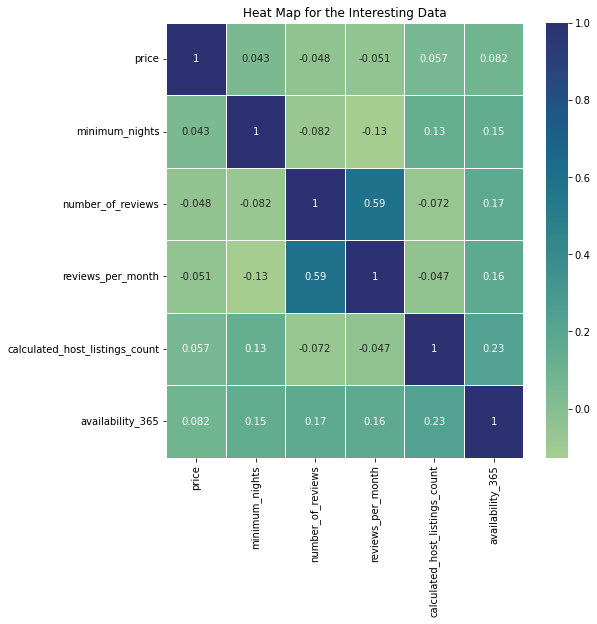

In [30]:
# Displaying the heat map of the Pearson correlation

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(int_corr, cmap="crest", annot=True, linewidths=0.5)
ax.set_title("Heat Map for the Interesting Data")
plt.show()

In [31]:
# From the heat map of the Pearson correlation analysis on all pairs 
# of those variables, we can notice that the colors closest to dark Blue
# indicate a moderately positive correlation, while a lighter and more
# green/light green color indicates a negative correlation.

# After analyzing the heat map, I am able to determine that the most 
# positive correlation is between the reviews per month and the
# number of reviews that a Airbnb listing receives. The Pearson correlation
# coefficient for that relationship is 0.59, which is indicated by the
# blue color in the above heat map.

# I am also able to determine that the most negative correlation is between
# the reviews per month and the minimum nights of an Airbnb listing.
# The Pearson correlation coefficient for that relationship is -0.13, which
# is the lowest value in the heat map, but it is relatively close to 0,
# which indicates a near neutral correlation between the two features.
# This most negative value can be determined by its light green color
# in the heat map above.

In [32]:
# I will display the most positive values from the Pearson correlation.

print("Here are the most positive values from the Pearson Correlation")
positives = int_corr[int_corr!=1]
positives.max().sort_values(ascending=False)

# Notice how the values of 0.589125 are the same for number_of_reviews
# and reviews_per_month because their correlation is the highest.

# The 0.589125 correlation coefficient is greater than 0 and is moderately
# close to positive 1, which indicates a relatively linear relationship
# between the two features, number of reviews and reviews per month.

# What to take away from this correlation coefficient of 0.589125 is that
# an airbnb listing with a greater number of reviews would see a similarly
# high number of reviews per month. This is very reasonable because
# more reviews would definitely increase the monthly review rate. 

Here are the most positive values from the Pearson Correlation


number_of_reviews                 0.589125
reviews_per_month                 0.589125
calculated_host_listings_count    0.225795
availability_365                  0.225795
minimum_nights                    0.145924
price                             0.081836
dtype: float64

In [33]:
# I will display the most negative values from the Pearson correlation.

print("Here are the most negative values from the Pearson Correlation")
int_corr.min().sort_values(ascending=True)

# Notice how the values of -0.127342 are the same for minimum_nights
# and reviews_per_month because their correlation is the most negative.

# There isn't much to get away from the negative values in this Pearson
# correlation analysis since the coefficient is very close to 0, which would
# indicate that there is a near non-linear relationship between the two
# features, minimum nights and reviews per month.

Here are the most negative values from the Pearson Correlation


minimum_nights                   -0.127342
reviews_per_month                -0.127342
number_of_reviews                -0.081573
calculated_host_listings_count   -0.072417
price                            -0.050552
availability_365                  0.081836
dtype: float64

## Task 03 - Explanation

From the set of the most interesting features, the Pearson correlation was applied to the 6 applicable features of price, minimum nights, number of reviews, reviews per month, calculated host listings count, and availability 365. I used the Pandas dataframe function of corr() to acquire the Pearson correlation analysis then used Seaborn to display the heat map to the user. From the heat map, I was able to determine that the most positive correlation was between the number of reviews and the reviews per month, which had a correlation coefficient of 0.59. From the heat map, I was also able to determine that the most negative correlation was between the minimum nights and the reviews per month, which had a correlation coefficient of -0.13. Although, the 0.59 indicates a relatively moderate positive correlation, the -0.13 is very close to 0, which indicates a near non-linear relationship between the two features of the minimum nights and the reviews per month.

## Task 04 - Start

### The Latitude and Longitude of all the Airbnb listings are provided in the dataset.

#### (a) Plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, and the points are color coded based on the neighborhood group features.

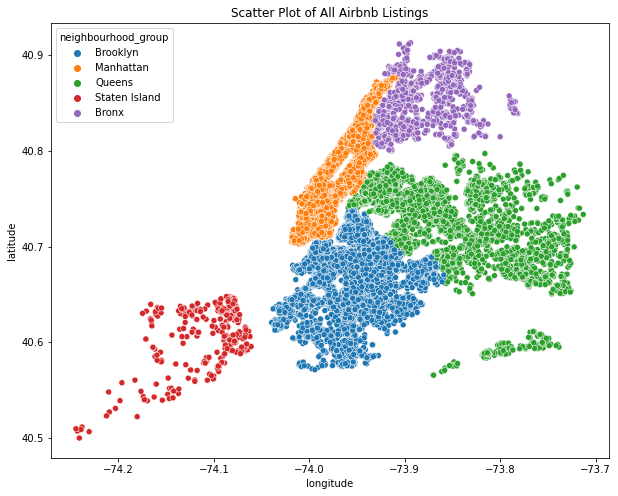

In [34]:
# Creating the scatter plot based on the (x,y) or (longitude, latitude)
# of all the Airbnb listings provided in the cleaned dataset. As viewed
# below, Brooklyn listings are indicated by the blue color, Manhattan
# listings are indicated by the orange color, Queens listings are indicated
# by the green color, Staten Island listings are indicated by the red color,
# and the Bronx listings are in purple.

fig, ax = plt.subplots(figsize=(10,8))
scatter_plot = sb.scatterplot(data=dataset, x='longitude', y='latitude', hue='neighbourhood_group')
ax.set_title("Scatter Plot of All Airbnb Listings")
plt.show()

## Task 04 - Continued.

#### (b) Now again, plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, and the points are color coded based on the price of the particular Airbnb, where price of the listing is less than 1000. Looking at the graph can you tell which neighborhood group is the most expensive.

In [35]:
# Grabbing the listings of the original dataset that satisfy the condition
# where price is less than 1000. 

# Added the sorting function to the dataset we are looking at since original
# approach without sorting resulted in the larger prices being under
# the less expensive points on the scatter plot. 

data_lt1000 = dataset[dataset['price'] < 1000].sort_values(by='price', ascending=True)

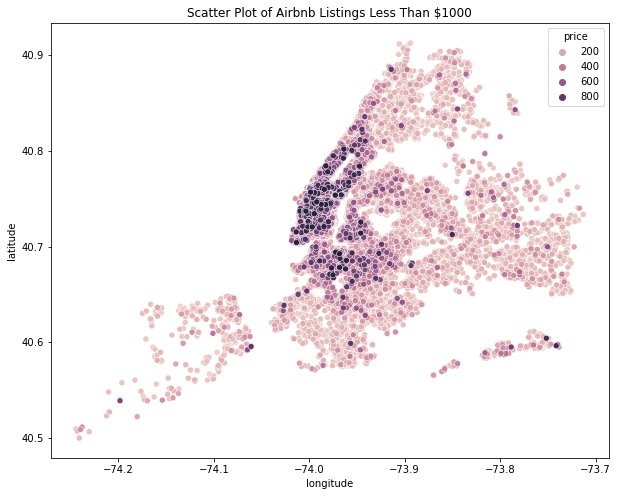

In [36]:
# Displaying the scatter plot of the airbnb listings that have a price
# less than $1000. As it can be examined from the scatter plot below, 
# the lighter points / more pink points indicate a lower pricing of the
# listing. However, the darker and more purple points indicate a more 
# expensive airbnb listing.

fig, ax = plt.subplots(figsize=(10,8))
scatter_plot = sb.scatterplot(data=data_lt1000, x='longitude', y='latitude', hue='price')
ax.set_title("Scatter Plot of Airbnb Listings Less Than $1000")
plt.show()

# As it can be examined from the scatter plot below, the appearance of 
# the darker, purple points are more densely grouped up within the 
# neighborhood group of Manhattan. Although, there are a considerable 
# amount of purple/dark points in Brooklyn, there seems to be a greater
# amount of purple/dark points in Manhattan.

# This leads to the conclusion that the most expensive neighborhood 
# group based on the scatter plot is Manhattan. 

## Task 04 - Explanation

This explanation is for Task 04 part b, where it asks to plot a scatter plot based on the airbnb listings' coordinates and have the points be color coded based on their prices. All this along with the requirement that the listings must have a price of less than \\$1000.

Looking at the scatter plot for task 04 part b, I was able to clearly notice that the majority of the darker/purple points were contained within the neighborhood group of Manhattan. Although, there were a considerable number of dark/purple points in the neighborhood group of Brooklyn. Overall, however, there were more dark/purple points in Manhattan, which I decided was the most expensive neighborhood group of all five neighborhood groups.

## Task 05 - Start

### Word clouds are a useful tool to explore the text data. Extract the words from the name of the Airbnb and generate a word cloud.

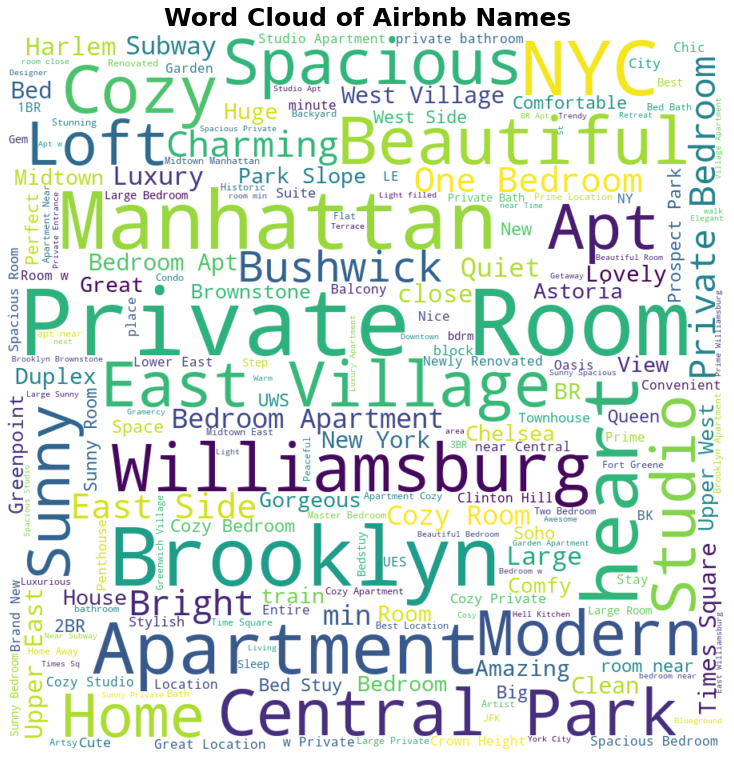

In [37]:
# Using the WordCloud generator from the imported library, wordcloud.
# Making the dimensions of the word cloud large so viewers can easily
# point out which words are used more often than others. 

name_cloud = WordCloud(background_color="white", width=900, height=900).generate(' '.join(dataset['name']))

plt.figure(figsize=(12,10) )
plt.axis("off")
plt.imshow(name_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Airbnb Names', fontsize=25, fontweight='bold')
plt.show()

## Task 05 - Explanation

The word cloud above shows which words and terms were used most in all the names of the Airbnb listings from the dataset. After an initial look at the word cloud, we can see that some of the most used words in the names of the Airbnb listings were: "Private Room", "NYC", "Brooklyn", "Manhattan", "Central Park", "East Village", and "Williamsburg". There were also listings using words that were less popular/frequent within the dataset such as: "Artist", "Greenwich Village", "3BR", "Private Entrance", and "Getaway".

After looking at the words and phrases that were most commonly used, I would have to say that they are more eyecatching and generally something someone searching for an Airbnb listing would search into their search bar. Terms such as "3BR" and "Artist" aren't typically something a person would search for, but stumble upon in the Airbnb listing's description page.

## Task 06 - Start

### Find out which areas have the busiest (hosts with high number of listings) hosts. Are there any reasons, why these hosts are the busiest, considering factors such as the availability, price, review, etc.? Bolster your reasoning with different plots and correlations.

In [38]:
# Trying to sort the dataset by the total number of listings that a host has and group by the
# respective neighborhood group because we wouldn't want to see a host have listings throughout
# five neighborhood groups and classify them as the same. 

busy_hosts = dataset.groupby(['host_id','neighbourhood_group'])['calculated_host_listings_count'].count().sort_values(ascending=False)

In [39]:
# Displaying the top 5 busiest hosts

busy_hosts.head()

# We can see that the top 5 busiest hosts have the host id numbers of
# 219517861, 107434423, 30283594, 12243051, 16098958
# The host names, in their respective order to the ids above, are:
# Sonder (NYC), Blueground, Kara, Sonder, Jeremy & Laura
# We can observe that all top 5 busiest hosts have their listings in Manhattan.

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
12243051   Manhattan               96
16098958   Manhattan               96
Name: calculated_host_listings_count, dtype: int64

In [40]:
# This is the number 1 most busy host out of the five.
# Will be acquiring the dataframe with just the listings belonging to the host id number that
# matches the value below. Also, printing the number of listings that this host has.

busy01 = dataset[dataset['host_id'] == 219517861]
print("The number of listings by #1 busy, Sonder (NYC) is:",busy01.shape[0])
busy01.head()

The number of listings by #1 busy, Sonder (NYC) is: 327


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,0.00,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81


In [41]:
# This is the number 2 most busy host out of the five. 
# I will be acquiring the dataframe with just the listings belonging to the host id number that
# matches the value below. Also, printing the number of listings that this host has.

busy02 = dataset[dataset['host_id'] == 107434423]
print("The number of listings by #2 busy, Blueground, is:", busy02.shape[0])
busy02.head()

The number of listings by #2 busy, Blueground, is: 232


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,NaN,0.00,232,156
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,NaN,0.00,232,223
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,NaN,0.00,232,316


In [42]:
# This is the number 3 most busy host out of the five. 
# I will be acquiring the dataframe with just the listings belonging to the host id number that
# matches the value below. Also, printing the number of listings that this host has.

busy03 = dataset[dataset['host_id'] == 30283594]
print("The number of listings by #3 busy, Kara, is:", busy03.shape[0])
busy03.head()

The number of listings by #3 busy, Kara, is: 121


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,2018-12-07,0.09,121,364
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,30,0,NaN,0.00,121,174
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,30,0,NaN,0.00,121,364
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,NaN,0.00,121,201
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,2017-12-31,0.07,121,161


In [43]:
# This is the number 4 most busy host out of the five. 
# I will be acquiring the dataframe with just the listings belonging to the host id number that
# matches the value below. Also, printing the number of listings that this host has.

busy04 = dataset[dataset['host_id'] == 12243051]
print("The number of listings of #4 busy, Sonder, is:", busy04.shape[0])
busy04.head()

The number of listings of #4 busy, Sonder, is: 96


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30637,23702074,Sonder | 180 Water | Lovely 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70738,-74.00493,Entire home/apt,212,29,0,NaN,0.00,96,332
30640,23702442,Sonder | 180 Water | Delightful 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70753,-74.00514,Entire home/apt,205,29,1,2018-05-04,0.07,96,338
30649,23713405,Sonder | 180 Water | Luxurious 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70805,-74.00581,Entire home/apt,205,29,2,2018-08-17,0.14,96,10
30653,23714684,Sonder | 180 Water | Stunning 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70656,-74.00499,Entire home/apt,215,29,0,NaN,0.00,96,343
30694,23750623,Sonder | 180 Water | Grand 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70786,-74.00476,Entire home/apt,220,29,0,NaN,0.00,96,220


In [44]:
# This is the number 5 most busy host out of the five. 
# I will be acquiring the dataframe with just the listings belonging to the host id number that
# matches the value below. Also, printing the number of listings that this host has.

busy05 = dataset[dataset['host_id'] == 16098958]
print("The number of listings by #5 busy, Jeremy & Laura, is:", busy05.shape[0])
busy05.head()

The number of listings by #5 busy, Jeremy & Laura, is: 96


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5093,3662724,5144-Prime Doorman!78ST & Madison,16098958,Jeremy & Laura,Manhattan,Upper East Side,40.77448,-73.96102,Entire home/apt,175,30,2,2019-05-30,0.06,96,281
5123,3686493,Irving Place!Doorman!Laundry 5135,16098958,Jeremy & Laura,Manhattan,Gramercy,40.73632,-73.98475,Entire home/apt,175,30,0,NaN,0.00,96,312
5286,3819703,5107-Studio Doorman GYM LuX,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79082,-73.97452,Entire home/apt,140,30,4,2017-09-04,0.09,96,342
5357,3867705,5146-Doorman Pool!1 bedroom View,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79370,-73.96590,Entire home/apt,185,30,2,2018-07-16,0.13,96,310
5372,3882103,5136-Doorman 2 bedroom 3 beds!,16098958,Jeremy & Laura,Manhattan,Hell's Kitchen,40.76665,-73.98660,Entire home/apt,250,30,0,NaN,0.00,96,281


In [45]:
# Concatenating all five of these dataframes belonging to the top 5 busiest hosts to acquire
# a resulting dataframe in which all the listings belong to the top 5 busiest hosts.
# I will be printing out the total number of listings of this new dataframe.

top_05 = pd.concat([busy01, busy02, busy03, busy04,busy05])
total_num = busy01.shape[0] + busy02.shape[0] + busy03.shape[0] + busy04.shape[0] + busy05.shape[0]
print("The total number of listings of the top 5 busiest hosts is:", total_num)

# Displaying this new dataframe to the user.

top_05

The total number of listings of the top 5 busiest hosts is: 872


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,0.00,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42604,33070416,Prime 1 bedroom Doorman Gym RoofDeck 5221,16098958,Jeremy & Laura,Manhattan,Midtown,40.74885,-73.98698,Entire home/apt,260,30,1,2019-05-06,0.46,96,343
42605,33071794,Prime Location 44stDoorman Gym Studio!5217,16098958,Jeremy & Laura,Manhattan,Midtown,40.75032,-73.97143,Entire home/apt,175,30,0,NaN,0.00,96,342
42609,33072686,Prime Location One Bed Doorman Gym Deck!5223,16098958,Jeremy & Laura,Manhattan,Hell's Kitchen,40.76291,-73.98750,Entire home/apt,250,30,0,NaN,0.00,96,303
42611,33072804,34th and 6th Ave - Doorman Gym Roofdeck 1 bed ...,16098958,Jeremy & Laura,Manhattan,Midtown,40.74909,-73.98657,Entire home/apt,170,30,1,2019-05-12,0.51,96,345


In [46]:
# Attempting to find correlations between the different features of the dataset by
# using the Pearson correlation.

busy_corr = top_05.corr(method='pearson')

# Displaying the Pearson correlation chart to the user.

busy_corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.709521,-0.404500,-0.277386,0.075884,-0.288827,0.147861,0.291868,0.742511,-0.060475
host_id,0.709521,1.000000,-0.403903,-0.358551,0.057236,-0.541436,0.439927,0.551897,0.990282,0.054527
latitude,-0.404500,-0.403903,1.000000,0.823738,-0.006973,0.388304,-0.368715,-0.455209,-0.392381,-0.072893
longitude,-0.277386,-0.358551,0.823738,1.000000,-0.068840,0.377406,-0.352363,-0.429250,-0.353007,-0.141758
price,0.075884,0.057236,-0.006973,-0.068840,1.000000,0.023147,0.056587,0.093768,0.094062,-0.080814
minimum_nights,-0.288827,-0.541436,0.388304,0.377406,0.023147,1.000000,-0.684923,-0.743240,-0.493969,-0.042572
number_of_reviews,0.147861,0.439927,-0.368715,-0.352363,0.056587,-0.684923,1.000000,0.917008,0.395299,0.018631
reviews_per_month,0.291868,0.551897,-0.455209,-0.429250,0.093768,-0.743240,0.917008,1.000000,0.510378,0.033503
calculated_host_listings_count,0.742511,0.990282,-0.392381,-0.353007,0.094062,-0.493969,0.395299,0.510378,1.000000,0.023243
availability_365,-0.060475,0.054527,-0.072893,-0.141758,-0.080814,-0.042572,0.018631,0.033503,0.023243,1.000000


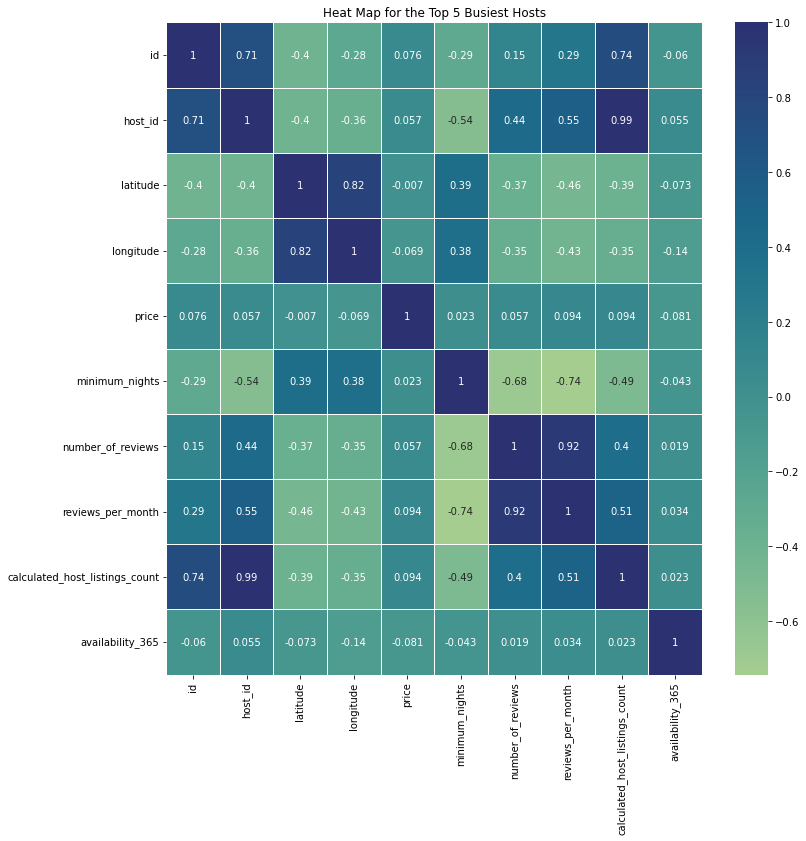

In [47]:
# Displaying the heat map of the Pearson correlation

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(busy_corr, cmap='crest', annot=True, linewidths=0.5)
ax.set_title('Heat Map for the Top 5 Busiest Hosts')
plt.show()

# With this heat map, a darker or more dark blue color indicates a more positive correlation, while
# a lighter color towards light green indicates a more negative correlation.
# Correlations like number of reviews + reviews per month don't provide much to us since it is only
# natural for more reviews correlating to more reviews per month. The longitude + latitude correlation
# also doesn't provide much since they're naturally correlated. The correlations between id + host id 
# doesn't tell us much so we ignore. Also, we will ignore the host id + calculated host listings count 
# because each host id would certainly have a positively correlated list of reviews tied to their host id.

# On to the main analysis of this heat map of the top 5 busiest hosts:
# (1) The first observation, when looking to the darker colors of the heat map that would correlate
# to a positive correlation coefficient between two features, that I noticed would have to be the 
# relationship between host id and number of reviews / reviews per month.
# I found this to be very notable since this shows a moderately positive correlation / relationship
# between the features of host id + reviews per month (0.55) and host id + number of reviews (0.44).
# This indicates a close linear relationship, which can also be explained by the fact that these busy
# hosts have more reviews coming in being associated with their listings.
# (2) Another observation would have to be the correlation between the host id + minimum nights required
# for the listings. The correlation coefficient is -0.54, which is closer to -1 than 0, and indicates
# a moderately negative relationship between the two features. This comes to show that these busy hosts may
# have their success due to the fact that their listings have a generally low number of minimum nights
# required per listing. This could possibly explain a greater desire to rent out their listings as compared
# to another host or listing.



In [48]:
# Creating a copy of a dataset without the top 5 busiest hosts for comparison reasons.

excl_top05 = dataset.copy()

# The new dataset will remove the rows/listings that belong to the top 5 busiest hosts. The reason
# for doing so is to examine the statistics compared to the top 5 busiest. This makes it easier
# to examine the difference in mean/median pricing and other features such as correlation factors.

excl_top05 = excl_top05[excl_top05['host_id']!=219517861]
excl_top05 = excl_top05[excl_top05['host_id']!=107434423]
excl_top05 = excl_top05[excl_top05['host_id']!=30283594]
excl_top05 = excl_top05[excl_top05['host_id']!=12243051]
excl_top05 = excl_top05[excl_top05['host_id']!=16098958]

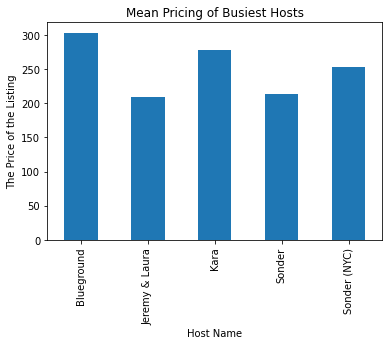

In [49]:
# finding the mean pricing for each host of the top 5 busiest hosts.

mean_hosts = top_05.groupby('host_name')['price'].mean()

# Displaying the mean listing pricing for each host in a bar plot. 

bar_host_mean = mean_hosts.plot.bar(x='host_name', y='price', title='Mean Pricing of Busiest Hosts')
bar_host_mean.set_xlabel("Host Name")
bar_host_mean.set_ylabel("The Price of the Listing")
print()

# As we can view from the displayed bar plot below, the most expensive average listing price belongs
# to the Blueground host, who has an average pricing of $303 for their airbnb listings.
# The least expensive average listing price belongs to the host Jeremy & Laura, who have an
# average pricing of around $209 for their airbnb listings.

# The reasoning for these relatively high mean pricing for the airbnb listings for these top 5
# busiest hosts can most likely be attributed to the location of the listing. Since a more desirable
# listing in a potentially wealthy neighborhood can explain the higher pricing for the airbnb.

In [50]:
# Displaying the actual values from the mean pricing of the top 5 busiest hosts

mean_hosts

host_name
Blueground        303.150862
Jeremy & Laura    208.958333
Kara              277.528926
Sonder            213.031250
Sonder (NYC)      253.195719
Name: price, dtype: float64

In [51]:
# Calculating the mean pricing of all the hosts excluding the top 5 busiest hosts

mean_excl_hosts = excl_top05.groupby('host_name')['price'].mean()
print("The mean pricing of the listings excluding the top 5 busiest is :",mean_excl_hosts.mean())

# As we can seen from the printed value below, the mean pricing of an airbnb listing from the
# hosts other than the top 5 busiest is around $148.15. This value seems to be a lot less than 
# the average value of the listings by the top 5 busiest hosts. Where the bar plot seen in the
# cell above can depict the lowest average belonging to Jemerey & Laura, which have a mean pricing
# of around $209, and the highest average belonging to Blueground, which has a mean pricing of around
# $303. Based on these observations, we can see that the busiest hosts tend to have a greater average
# pricing for their listings compared to the less busy hosts and their listings. 

# Most possibly, this can be attributed to more expensive rental listings in more prestigious neighborhoods
# or in locations with greater demand / tourism, such as in Williamsburg, Dumbo, Times Square, etc.
# The other hosts in the dataset might have listings in less desirable locations of the city.

The mean pricing of the listings excluding the top 5 busiest is : 148.1486782050022


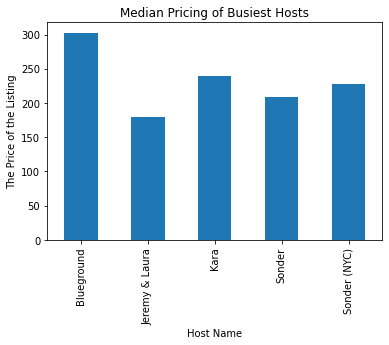

In [52]:
# finding the median pricing for each host of the top 5 busiest hosts.

median_hosts = top_05.groupby('host_name')['price'].median()

# Displaying the median listing pricing for each host in a bar plot. 

bar_host_median = median_hosts.plot.bar(x='host_name', y='price', title='Median Pricing of Busiest Hosts')
bar_host_median.set_xlabel("Host Name")
bar_host_median.set_ylabel("The Price of the Listing")
print()

In [53]:
# Displaying the actual median pricing values of the top 5 busiest hosts in NYC.

median_hosts

#  Host Name        mean           median       comparison
# Blueground        303.150862     302.5        mean ~= median
# Jeremy & Laura    208.958333     180.0        mean > median
# Kara              277.528926     239.0        mean > median
# Sonder            213.031250     209.5        mean ~= median
# Sonder (NYC)      253.195719     228.0        mean > median

# Observing the mean and median of the top 5 busiest hosts and their listings, I can see
# that for Blueground and Sonder, their mean and median pricing is around the same.
# However, for the other three busiest hosts, the mean is nearly 20-35 dollars more than the
# median, which can possibly be explained by the fact that there are outliers present, which
# skew the graph towards the right. 

host_name
Blueground        302.5
Jeremy & Laura    180.0
Kara              239.0
Sonder            209.5
Sonder (NYC)      228.0
Name: price, dtype: float64

In [54]:
# Calculating the median pricing of all the hosts excluding the top 5 busiest hosts.
# This can perhaps be able to give a value that excludes outliers in our dataset.

median_excl_top05 = excl_top05['price'].median()

print('The median pricing of the listings excluding the top 5 busiest is:', median_excl_top05)

# From the value printed below as the median of the dataset that excludes the top 5 busiest hosts,
# we can see that the median pricing of the airbnb listings is $103.00, which is a lot less than 
# the mean pricing of $148.15. Perhaps there were more listings that were higher in monetary value
# compared to the less expensive listings, which made the average/mean be nearly $45 more than the median.

# However, this does show how the median pricing of $103.00 is still far from the lower end of the
# top 5 busiest hosts' mean pricing of around $209. Compared to the median pricing of the top 5 busiest
# hosts and their listings, the price of $103.00 is far from the lowest median pricing of $180.00, which
# belongs to Jeremy & Laura. The highest median pricing of the top 5 busiest belongs to Blueground,
# which has a median pricing of $302.00

# Looking at both the mean and median pricing of the other listings exlcuding the top 5 busiest hosts,
# we can see that both values are far from the mean and median pricing of the top 5 busiest hosts and their
# listings. This can possibly be correlated where the top 5 busiest hosts earn their titles as busiest in the
# city primarily because of the fact that their listings are more expensive than the average listing's pricing.

The median pricing of the listings excluding the top 5 busiest is: 103.0


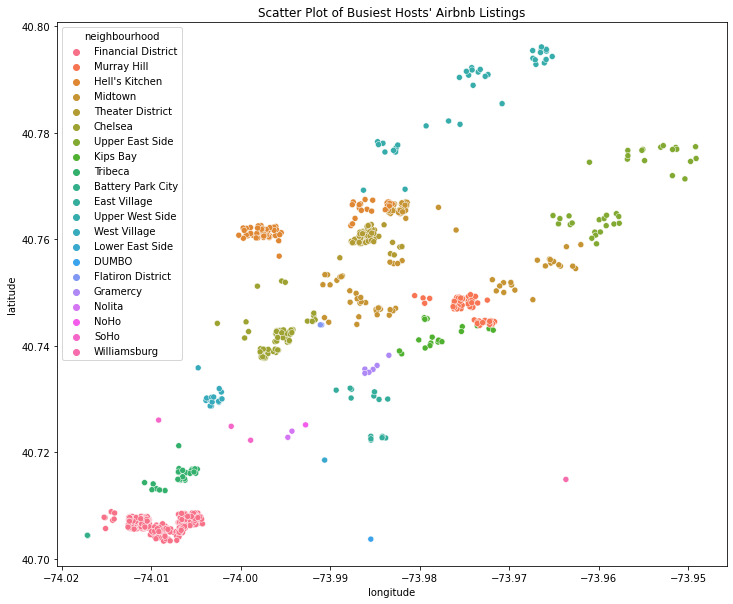

In [55]:
# Plotting out a scatter plot based on the coordinates of the busiest hosts' airbnb listings
# the points are color coded based on the neighborhood of the listing.

# originally, I had the color code be based on the neighborhood groups, but all but 2 of
# the listings were in Manhattan. There were only 2 listings in Brooklyn so I decided to
# do color code based off the neighborhood itself. This worked out much nicer since there are
# more colors to view and what groups the points are clustered around within the scatter plot.

fig, ax = plt.subplots(figsize=(12,10))
scatter_hosts = sb.scatterplot(data=top_05, x='longitude', y='latitude', hue='neighbourhood')
ax.set_title("Scatter Plot of Busiest Hosts' Airbnb Listings")
plt.show()

# From the first observation, I am able to tell that some of the more busy neighborhoods from
# the listings of the top 5 busiest hosts are: Financial District, Midtown, Hell's Kitchen, and
# Murray Hill. There are more points with their respective color clustered in tight groups within
# the scatter plot below. This can definitely be correlated with the average cost of the airbnb
# listing and have a linear relationship between the neighborhood + reason for being busy.

In [56]:
# To confirm the observations seen from the scatter plot in the cell above, here is the sorted
# list of the neighborhoods and their respective number of listings.

top_05.groupby(['neighbourhood']).size().sort_values(ascending=False)

# As we can see, the neighborhood with the most number of listings correlating to the top 5
# busiest hosts belong in the Financial District (313 listings). All the other neighborhoods
# on this list are not cheap, as we can see that nearly all of them are in Manhattan.

# I was wondering why the bar plot with the mean/average listing pricing was relatively high 
# with a range of around $200 to $300 for the average listing of the top 5 busiest hosts.
# But after looking at the locations of the listings, it is clear to see that the hosts may have
# their busy success be attributed to the location of the listings and the demand for such would be
# relatively high due to more wealthy clients seeking a room that is close to the many locations 
# and views offered by Manhattan. 

neighbourhood
Financial District    313
Midtown                89
Hell's Kitchen         79
Murray Hill            76
Theater District       72
Chelsea                69
Upper West Side        39
Upper East Side        36
Tribeca                31
Kips Bay               19
West Village           16
East Village           14
Gramercy                6
SoHo                    3
Battery Park City       2
Nolita                  2
Flatiron District       2
NoHo                    1
Lower East Side         1
DUMBO                   1
Williamsburg            1
dtype: int64

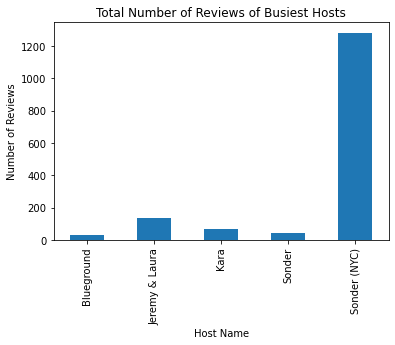

In [57]:
# Seeing how the review count looks for the top 05 busiest hosts in NYC.

review_top05 = top_05.groupby('host_name')['number_of_reviews'].sum()

# Displaying the total number of reviews for each host in the form of a bar plot.

bar_host_review = review_top05.plot.bar(x='host_name', y='number_of_reviews', title='Total Number of Reviews of Busiest Hosts')
bar_host_review.set_xlabel("Host Name")
bar_host_review.set_ylabel("Number of Reviews")
print()

# From these initial observations, the three hosts Blueground (29 reviews), Sonder (43), and Kara (65)
# have the least number of reviews. Although they are busy hosts with one of the highest count of listings
# in the city, apparently their review total is very low.
# The next highest number of total reviews belongs to the host Jeremy & Laura, with a count of 138 reviews.
# This may seem higher than the previously mentioned three hosts, but the host with the most number of reviews
# out of the top 5 busiest hosts is Sonder (NYC) with 1281 reviews in total. Their value seems to blow the others
# out of the water being nearly 1100-1200 more in reviews. Let's see how these values compare to the average and 
# median number of reviews of the hosts excluding the top 5 busiest hosts.

# As we can see, the bar plot depicts the host, Sonder (NYC), having a total number of reviews that
# greatly trumps over the other hosts.

In [58]:
# Printing the actual number of reviews for each host. 

review_top05

host_name
Blueground          29
Jeremy & Laura     138
Kara                65
Sonder              43
Sonder (NYC)      1281
Name: number_of_reviews, dtype: int64

In [59]:
# Calculating the mean number of reviews of all the hosts excluding the top 5 busiest hosts

mean_excl_reviews = excl_top05.groupby('host_name')['number_of_reviews'].mean()
print("The mean number of reviews of the listings excluding the top 5 busiest is :",round(mean_excl_reviews.mean()))

# The mean number of reviews for the listings excluding the top 5 busiest hosts is 25, which is only slightly
# less than the lowest number of reviews of the top 5 busiest, which belongs to Blueground with their number of
# reviews being 29. The mean number of reviews of 25 is nowhere close to the highest of the top 5 busiest, which
# belongs to Sonder (NYC) with a total number of 1281 reviews. 

The mean number of reviews of the listings excluding the top 5 busiest is : 25


In [60]:
# Calculating the median number of reviews of all the hosts excluding the top 5 busiest hosts.
# This can perhaps be able to give a value that excludes outliers in our dataset.

median_excl_top05 = excl_top05['number_of_reviews'].median()

print('The median number of reviews of the listings excluding the top 5 busiest is:', round(median_excl_top05))

# The median number of reviews for the listings excluding the top 5 busiest hosts is 5, which is far less than the mean
# number of reviews. This can most likely be explained by the fact there was a large percentage of listings
# with 0 reviews. Finding the median only barely left the range of listings with zero reviews. However, this does come to
# the conclusion that the median number of reviews is far from the top 5 busiest hosts' and their numbers of reviews. 

The median number of reviews of the listings excluding the top 5 busiest is: 5


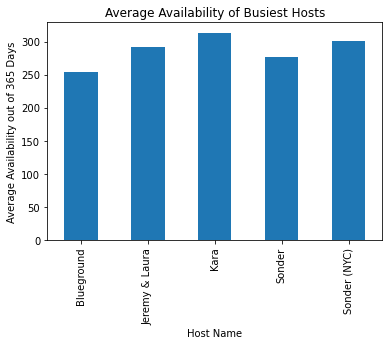

In [61]:
# Seeing how the availability looks for the top 05 busiest hosts in NYC. Will be looking at the mean for this.

avail_top05 = top_05.groupby('host_name')['availability_365'].mean()

# Displaying the average availability for each host's listings in the form of a bar plot.

bar_host_avail = avail_top05.plot.bar(x='host_name', y='availability_365', title='Average Availability of Busiest Hosts')
bar_host_avail.set_xlabel("Host Name")
bar_host_avail.set_ylabel("Average Availability out of 365 Days")
print()

# From my initial observation of the plotted bar graph below, I can see that the average availability
# from the top 5 busiest hosts are relatively high with the lowest value belonging to the host, Blueground,
# with a average availability of around 250 days out of the 365 days in the year. The highest average of 
# availability belongs to the host, Kara, with a value of around 315 days in the year.
# Perhaps there is a correlation with the average availability of the listings as the reason for why the
# top 5 busiest hosts being busy as such. Will have to look at the mean and median availability of the dataset
# excluding the top 5 busiest hosts, but my conclusion so far is that there is a correlation between
# the availability of the listing and how busy a host is.

In [62]:
# Printing the actual numbers for the availability of each of the busiest hosts' and their listings.

avail_top05

# Looking at these values, the range of average availability of the top 5 hosts is 
# $253.81 (Blueground) as the minimum and $313.42 (Kara) as the maximum.
# The range isn't too drastic, but it does have a relatively high average out of the 365 days in the year.

host_name
Blueground        253.810345
Jeremy & Laura    292.322917
Kara              313.421488
Sonder            276.614583
Sonder (NYC)      301.492355
Name: availability_365, dtype: float64

In [63]:
# Calculating the average availability of all the hosts excluding the top 5 busiest hosts

mean_excl_avail = excl_top05.groupby('host_name')['availability_365'].mean()
print("The average availability of the listings excluding the top 5 busiest is :",round(mean_excl_avail.mean(), 2))

# Looking at the average availability of the dataset that excludes the top 5 busiest hosts, we can see
# that the value is a lot less than the lowest average availability value of the top 5 busiest hosts.
# The average availability of the non top 5 busiest hosts is around 101.08 days out of the year, while
# the lowest average availability of the top 5 busiest hosts is 253.81 days. With a difference of nearly
# 152 days, we can clearly see that there is perhaps a correlation between availability and how busy a host is.
# The number 101.08 is far from the highest average availability of the top 5 busiest hosts, which belongs to
# Kara with a value of 313.42 days. We will be analyzing the median availability next, which will 
# confirm or deny our thoughts as of far.

The average availability of the listings excluding the top 5 busiest is : 101.08


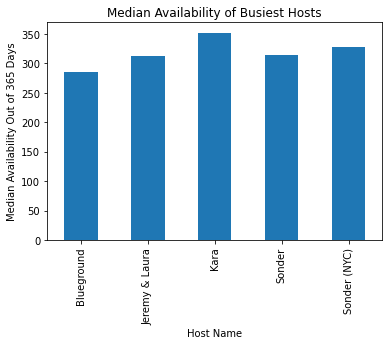

In [64]:
# finding the median availability for each host of the top 5 busiest hosts.

median_avail = top_05.groupby('host_name')['availability_365'].median()

# Displaying the median listing pricing for each host in a bar plot. 

bar_avail_median = median_avail.plot.bar(x='host_name', y='availability_365', title='Median Availability of Busiest Hosts')
bar_avail_median.set_xlabel("Host Name")
bar_avail_median.set_ylabel("Median Availability Out of 365 Days")
print()

In [65]:
# Printing the actual availability values for the median availabilities of the top 5 busiest hosts

median_avail

# We can see that the lowest median availability of the top 5 busiest hosts belongs to Blueground
# with a value of 285 days out of the year. While, the highest median availability of the top 5 
# busiest hosts belongs to Kara with a value of 352 days out of the year. Compared to the average
# availability values of the top 5 busiest, we can see that the median values are greater by around 30-40
# dollars for each host. Perhaps the listings had outliers making the availability graph skew left.

host_name
Blueground        285.0
Jeremy & Laura    312.0
Kara              352.0
Sonder            314.5
Sonder (NYC)      328.0
Name: availability_365, dtype: float64

In [66]:
# Calculating the median availability of all the hosts excluding the top 5 busiest hosts.
# This can perhaps be able to give a value that excludes outliers in our dataset.

median_excl_avail = excl_top05['availability_365'].median()

print('The median availability of the listings excluding the top 5 busiest is:', round(median_excl_avail))

# From observing the median availability of the dataset that excludes the top 5 busiest hosts, the value
# is 41 days which is drastically lower than the lowest average availability of the top 5 busiest hosts with
# a value of around 253 days. When compared to the median availabilities, this median value for the set excluding
# the top 5 busiest hosts doesn't project a similar trend of being greater than the mean availability.
# The median availability value of 41 days is nowhere close to the lowest median availability of the top 5 busiest
# hosts which belongs to the host Blueground with a value of 285 days, and nowhere close to the highest median
# availability of the top 5 which belongs to the host Kara with a value of 352 days. 

The median availability of the listings excluding the top 5 busiest is: 41


## Task 06 - Explanation

For this task, I was able to find the top 5 hosts, which were hosts that had the highest number of listings. The top 5 hosts were, in decreasing order of total number of listings per neighborhood group:
- Sonder (NYC)  -->    327
- Blueground  -->      230
- Kara  -->            121
- Sonder  -->          96
- Jeremey & Laura  --> 96

All of these top 5 hosts were predominately located within Manhattan with two listings being located in Brooklyn. After creating a new dataframe object using the listings of the top 5 busiest hosts, I created a Pearson correlation between the features and plotted such into a heatmap. I was able to decipher two oberservations from the heatmap being:
- The first observation, when looking to the darker colors of the heat map that would correlate to a positive correlation coefficient between two features, is that there would have to be a relationship between host id and number of reviews / reviews per month. I found this to be very notable since this shows a moderately positive correlation / relationship between the features of host id + reviews per month (0.55) and host id + number of reviews (0.44). This indicates a close linear relationship, which can also be explained by the fact that these busy hosts have more reviews coming in being associated with their listings.
- Another observation would have to be the correlation between the host id + minimum nights required for the listings. The correlation coefficient is -0.54, which is closer to -1 than 0, and indicates a moderately negative relationship between the two features. This comes to show that these busy hosts may have their success due to the fact that their listings have a generally low number of minimum nights required per listing. This could possibly explain a greater desire to rent out their listings as compared to another host or listing.

When looking at the median and mean pricing of the listings of the top 5 busiest hosts compared to the listings of everyone else, I came to the conclusion that the median and mean pricing of the top 5 busiest hosts were greater than those of the other hosts and listings in the dataset. Below are the hosts with their respective mean pricing:
- Blueground        303.150862
- Jeremy & Laura    208.958333
- Kara              277.528926
- Sonder            213.031250
- Sonder (NYC)      253.195719
The mean pricing of the dataset excluding the top 5 busiest hosts was 148.1486782050022, which is far from the lowest mean pricing of the top 5 busiest hosts belonging to Jeremy & Laura, who had a mean pricing of 208.96.

Below are the hosts with their respective median pricing:
- Blueground        302.5
- Jeremy & Laura    180.0
- Kara              239.0
- Sonder            209.5
- Sonder (NYC)      228.0
The median pricing of the dataset excluding the top 5 busiest hosts was 103.0, which is far from the lowest median pricing of the top 5 busiest hosts belonging to Jeremy & Laura, who had a median pricing of 180.0.

After looking at the mean and median pricing of the top 5 busiest hosts compared to the other Airbnb hosts, I was able to determine that there is a correlation between the price of a listing and how busy a host is. There is a linear positive relationship between the price and the busyness of a host, where an increase in price would correlate to a more busy host.

Next, we will be looking at the number of reviews and whether or not there is a correlation between it and how busy a host is. Below are the hosts with their respective number of reviews:
- Blueground          29
- Jeremy & Laura     138
- Kara                65
- Sonder              43
- Sonder (NYC)      1281
The mean number of reviews of the dataset excluding the top 5 busiest hosts was 25, which is slightly less than the lowest number of reviews from the top 5 busiest hosts. Compared to the lowest 4 number of reviews of the top 5 busiest hosts, the mean number of 25 is relatively close. However, compared to the largest number of reviews of the top 5 busiest hosts, which belongs to Sonder (NYC) with a value of 1281 reviews, the mean value of 25 is significantly far apart. The mean value of 25 being less than the average number of reviews of the top 5 busiest hosts does indicate a correlation between number of reviews and how busy a host. We will be looking at the median next to confirm our suspicions. The median number of reviews of the dataset excluding the top 5 busiest hosts was 5, which is a lot less than the mean number of reviews. With both the mean and median number of reviews of the dataset excluding the top 5 busiest hosts being less than the number of reviews belonging to the top 5 busiest hosts, it is safe to conclude that there is a positive correlation between the number of reviews and how busy a host is.

Next, we will be looking at the availability of the listing and whether or not there is a correlation between it and how busy a host is. Below are the hosts with their respective average availability of their listings:
- Blueground        253.810345
- Jeremy & Laura    292.322917
- Kara              313.421488
- Sonder            276.614583
- Sonder (NYC)      301.492355
The average availability of the dataset excluding the top 5 busiest hosts was 101.08 days, which is far from the lowest availability of the top 5 busiest hosts belonging to Blueground with an average availability of 253.81 days. Looking at the average availabilities of the top 5 busiest hosts, we can see that the lowest average availability belongs to Blueground with a value of 253.81 and the highest average availability belongs to Kara with a value of 313.42 days. These values are very high, which indicates that their listings are predominately available during the year to potential airbnb seekers. This can possibly indicate a positive linear correlation between the availability of an airbnb listing and how busy a host is. We will be looking at the median availability next.

Below are the hosts with their respective median availabilities, which would potentially be more accurate of a measure if there were any outliers present in the dataset:
- Blueground        285.0
- Jeremy & Laura    312.0
- Kara              352.0
- Sonder            314.5
- Sonder (NYC)      328.0
The median availability of the dataset excluding the top 5 busiest hosts was 41 days, which is a drastic drop in terms of percentages compared to the mean availability of 101.08 days. There is an increase from the mean availabilities of the top 5 busiest hosts to the median availabilities, where all 5 hosts have an increase of 30 to 45 additional days added to their availabilities. However, this similar trend wasn't present when looking at the mean availability of the dataset excluding the top 5 busiest hosts to the median of that same set. The median value of 41 days is drastically lower than the lowest median availability of the top 5 busiest hosts belonging to Blueground with a value of 285 days. With both the mean and median availabilities of the top 5 busiest hosts being greater than the mean and median availabilities of the dataset excluding the top 5 busiest hosts, I can conclude that there is a positive linear correlation between the availability of the listings and how busy a host is.

### In conclusion, after analyzing the different features such as location, pricing, number of reviews, and availability, I can conclude that the top 5 busiest hosts can have their success be attributed to the fact that their Airbnb listings are located in more desirable locations within Manhattan, the pricing of their listings are generally more expensive than other listings, the number of reviews that they have are generally greater than other hosts, and the availability of their listings generally are greater than other listings. There is a positive correlation between how busy a host is and (1) the pricing of their listings, (2) the number of revies they have, and (3) how available their listings are.